In [22]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [15]:
htmldoc="/content/hawaii_covid_cases.html"

with open(htmldoc) as fp:
    soup = BeautifulSoup(fp, "html.parser")   
item = soup.find('g')


In [16]:
covid_cases_hawaii = pd.DataFrame([])

In [17]:
dates = []
cases = []
for i in item.find_all('g'):
    dates.append(i["aria-label"][18:30])
    cases.append(int(i["aria-label"][30:]))

In [18]:
covid_cases_hawaii['date'] = dates
covid_cases_hawaii['date'] = pd.to_datetime(covid_cases_hawaii['date'])
covid_cases_hawaii['cases'] = cases
covid_cases_hawaii['cumsum'] = covid_cases_hawaii['cases'].cumsum(axis=0)

In [24]:
covid_cases_hawaii

,date,cases,cumsum
0,2020-03-03,0.0,0.0
1,2020-03-04,0.0,0.0
2,2020-03-05,0.0,0.0
3,2020-03-06,0.0,0.0
4,2020-03-07,0.0,0.0
...,...,...,...
636,2021-11-29,2.0,11681.0
637,2021-11-30,3.0,11684.0
638,2021-12-01,17.0,11701.0
639,2021-12-02,10.0,11711.0


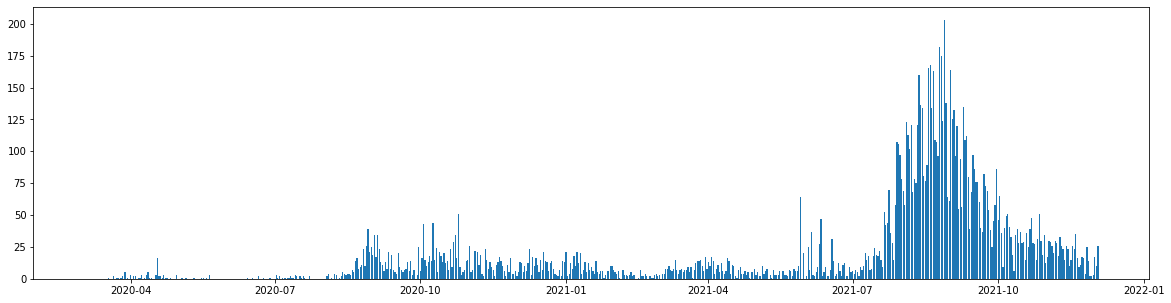

In [20]:
plt.figure(figsize=(20,5))
plt.bar(covid_cases_hawaii['date'], covid_cases_hawaii['cases'])
plt.show()

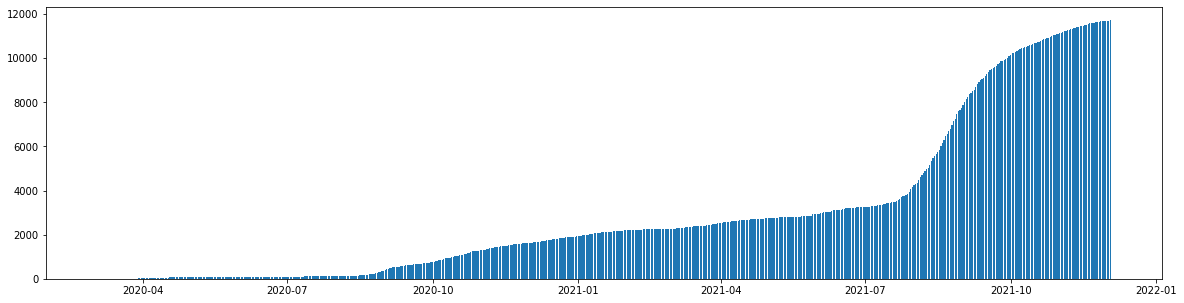

In [21]:
plt.figure(figsize=(20,5))
plt.bar(covid_cases_hawaii['date'], covid_cases_hawaii['cumsum'])
plt.show()

In [25]:
csv_file="/content/hawaii_covid_cases.csv"
covid_cases_hawaii.to_csv(csv_file, index=False)
files.download(csv_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>